In [250]:
# importing packages 
import numpy as np
import pandas as pd

In [251]:
#loading dataset 
data = pd.read_csv("conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")
data.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [252]:
print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [253]:
data_cols = data.columns.tolist()
print(data_cols)

['Unnamed: 0', 'Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS', 'group']


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [255]:
#blackbox imputations
def show_missing(data):
    missing=data.columns[data.isnull().any()].tolist()
    return missing

missing_col=show_missing(data)

#count of missing records
missing_count=data[missing_col].isnull().sum()

In [256]:
print(missing_col)

['Schooling', 'Initial_Symptom', 'Initial_EDSS', 'Final_EDSS']


In [257]:
print(missing_count)

Schooling            1
Initial_Symptom      1
Initial_EDSS       148
Final_EDSS         148
dtype: int64


In [258]:
#there is no need of unnamed for analysis process so let drop that column
data = data.drop('Unnamed: 0', axis=1)

In [259]:
#We have seen that Initial_EDSS and Final_EDSS columns have a huge proportion of NA's so we will drop them in this analysis.
data = data.drop(['Initial_EDSS', 'Final_EDSS'], axis=1)

In [260]:
print(data.columns)

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'group'],
      dtype='object')


In [261]:
#droping cols with null values 
data = data.dropna()
data.isna().sum().sum()

0

In [262]:
#All data must be of int type. Let's change them to integer.
data[data.columns] = data[data.columns].astype('Int64')

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 0 to 272
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender                   271 non-null    Int64
 1   Age                      271 non-null    Int64
 2   Schooling                271 non-null    Int64
 3   Breastfeeding            271 non-null    Int64
 4   Varicella                271 non-null    Int64
 5   Initial_Symptom          271 non-null    Int64
 6   Mono_or_Polysymptomatic  271 non-null    Int64
 7   Oligoclonal_Bands        271 non-null    Int64
 8   LLSSEP                   271 non-null    Int64
 9   ULSSEP                   271 non-null    Int64
 10  VEP                      271 non-null    Int64
 11  BAEP                     271 non-null    Int64
 12  Periventricular_MRI      271 non-null    Int64
 13  Cortical_MRI             271 non-null    Int64
 14  Infratentorial_MRI       271 non-null    Int64
 15  Spinal_Cord

In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split

In [265]:
# spliting the data into train and test sets
x = data.drop('group', axis=1)
y = data['group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [266]:
#features selection
#recursive feature elimination technique
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=42)

rfe_RF=RFE(RF,n_features_to_select=10,verbose=21)

rfe_RF.fit(x_train,y_train)
names=x_train.columns.tolist()
b=rfe_RF.ranking_

#RFE: Recursive Feature Elimination is corresponding to Machine Learning Model.
#ranking is a attribute

a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])
a.to_csv('feature_selection.csv')

RFE_selected=a['features'][a['rank']==1]

Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


In [267]:
print('the selected features :')
RFE_selected

the selected features :


0                    Age
1          Breastfeeding
2           Cortical_MRI
3                 Gender
4     Infratentorial_MRI
5        Initial_Symptom
6      Oligoclonal_Bands
7    Periventricular_MRI
8              Schooling
9              Varicella
Name: features, dtype: object

In [268]:
x_train=x_train[RFE_selected]

In [269]:
x_test=x_test[RFE_selected]

In [270]:
#Machine Learning model defualt models
RF_model=RandomForestClassifier()
RF_model.fit(x_train,y_train)

RandomForestClassifier()

In [271]:
#preddection of test data 
preds=RF_model.predict(x_test)
#Evaluation metrics
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, preds)
accuracy_test

0.8727272727272727

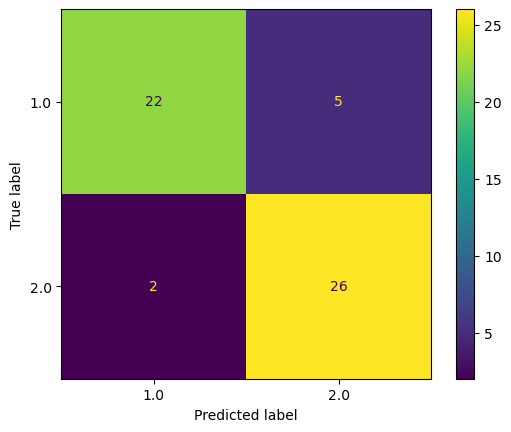

In [272]:
conf_mtrx = confusion_matrix(y_test, preds, labels=RF_model.classes_)
disp_mtrx = ConfusionMatrixDisplay(confusion_matrix=conf_mtrx, display_labels=RF_model.classes_)
disp_mtrx.plot();

In [273]:
type(RF_model)

sklearn.ensemble._forest.RandomForestClassifier

In [274]:
from sklearn.model_selection import GridSearchCV

In [311]:
#hyper perameter tuning 
param_grid = {"n_estimators" : [90,100,180],
              "max_depth" : [3,4,5],
              "criterion" : ['gini', 'entropy', 'log_loss'],
              "min_samples_leaf" : [2, 4 ,6],
              "max_features" : [0.4,0.5 ,0.6]
             }
#Use the GridSearchCV
RF_model=RandomForestClassifier() #estimator
clf = GridSearchCV(RF_model, param_grid, cv=3)
clf.fit(x_train,y_train)
clf.best_estimator_

C:\Users\ajayc\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomForestClassifier(criterion='log_loss', max_depth=4, max_features=0.4,
                       min_samples_leaf=2)

In [276]:
preds=clf.best_estimator_.predict(x_test)

#black box Evaluation metrics
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, preds)

In [277]:
accuracy_test

0.8181818181818182

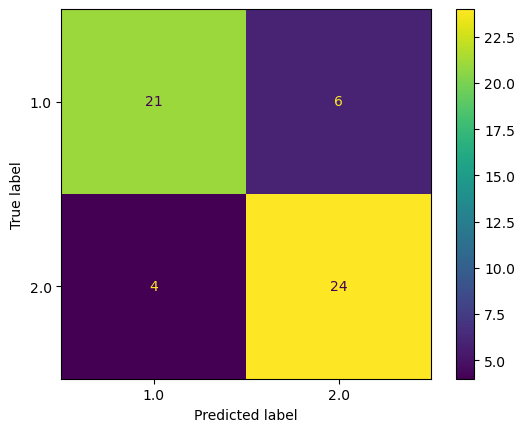

In [278]:
conf_mtrx = confusion_matrix(y_test, preds, labels=clf.best_estimator_.classes_)
disp_mtrx = ConfusionMatrixDisplay(confusion_matrix=conf_mtrx, display_labels=clf.best_estimator_.classes_)
disp_mtrx.plot();